In [1]:
import sys
from sklearn.svm import SVC
if sys.version_info[0] < 3:
	raise Exception("Python 3 not detected.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from scipy import io

if __name__ == "__main__":
    for data_name in ["mnist", "spam", "toy"]:
        data = np.load(f"../data/{data_name}-data.npz")
        print("\nloaded %s data!" % data_name)
        fields = "test_data", "training_data", "training_labels"
        for field in fields:
            print(field, data[field].shape)


loaded mnist data!
test_data (10000, 1, 28, 28)
training_data (60000, 1, 28, 28)
training_labels (60000,)

loaded spam data!
test_data (1000, 42)
training_data (4171, 42)
training_labels (4171,)

loaded toy data!
test_data (0,)
training_data (1000, 2)
training_labels (1000,)


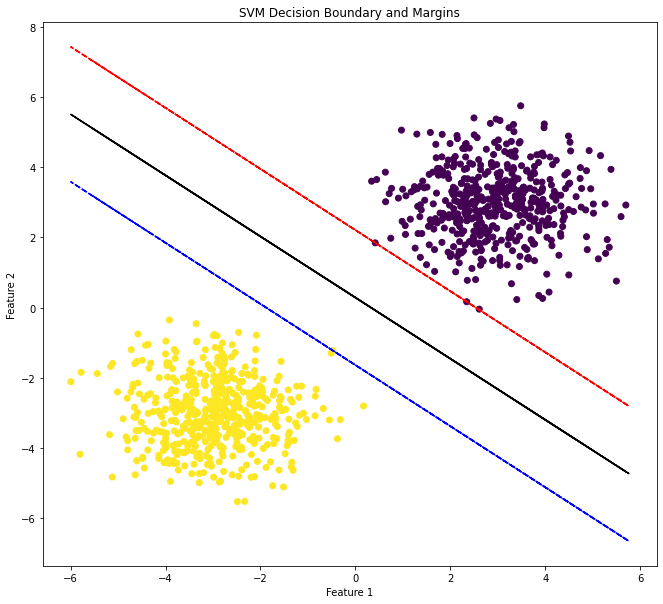

In [16]:
#Q2#
name_toy = "toy"
data_toy = np.load(f"../data/{name_toy}-data.npz")
training_toy = "training_data"
data1 = data_toy[training_toy]
labels = data_toy["training_labels"]
plt.scatter(data1[:, 0], data1[:, 1], c=labels)

# Plot the decision boundary
x = np.linspace(-5, 5, 100)
w = [-0.4528, -0.5190]
b = 0.1471
y = -(w[0] * x + b) / w[1]
plt.plot(x, y, 'k')

# Plot the margins
## TODO
def decision_boundary_and_margins(x, w_0, w_1, alpha):
    # Decision boundary: w_0 * x + w_1 * y + alpha = 0 => y = (-w_0 * x - alpha) / w_1
    y_boundary = (-w_0 * x - alpha) / w_1
    # Margin where y_i (w.x_i + alpha) = 1 for positive and negative classes
    y_margin_positive = (-w_0 * x - alpha + 1) / w_1
    y_margin_negative = (-w_0 * x - alpha - 1) / w_1
    return y_boundary, y_margin_positive, y_margin_negative

y_boundary, y_margin_positive, y_margin_negative = decision_boundary_and_margins(data1, w[0], w[1], b)

# Plotting the decision boundary and margins
plt.plot(data1, y_boundary, 'k-')
plt.plot(data1, y_margin_positive, 'b--')
plt.plot(data1, y_margin_negative, 'r--')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary and Margins')
plt.rcParams['figure.figsize'] = [6, 7]
plt.show()

In [3]:
#Q3 (a)#
np.random.seed(212)
name_mnist = "mnist"
data2 = np.load(f"../data/{name_mnist}-data.npz")
training_mnist = "training_data"
indices = list(range(data2["training_data"].shape[0]))

indices = np.random.permutation(data2["training_data"].shape[0])
# Use the shuffled indices to reorder the data and labels
shuffled_training_data_2 = data2["training_data"][indices]
shuffled_training_labels_2 = data2["training_labels"][indices]

# Split the MNIST training data
vali_data_2 = shuffled_training_data_2[:10000]
train_data_2 = shuffled_training_data_2[10000:]
vali_labels_2 = shuffled_training_labels_2[:10000]
train_labels_2 = shuffled_training_labels_2[10000:]

print("MNIST training data (after split):", train_data_2.shape)
print("MNIST validation data:", vali_data_2.shape)
print("MNIST training labels (after split):", train_labels_2.shape)
print("MNIST validation labels:", vali_labels_2.shape)

MNIST training data (after split): (50000, 1, 28, 28)
MNIST validation data: (10000, 1, 28, 28)
MNIST training labels (after split): (50000,)
MNIST validation labels: (10000,)


In [4]:
#Q3 (a)#
np.random.seed(212)
name_spam = "spam"
data3 = np.load(f"../data/{name_spam}-data.npz")
training_mnist = "training_data"
indices = list(range(data3["training_data"].shape[0]))

length = data3["training_data"].shape[0]
length_training = int(length / 5)
indices = np.random.permutation(length)
# Use the shuffled indices to reorder the data and labels
shuffled_training_data_3 = data3["training_data"][indices]
shuffled_training_labels_3 = data3["training_labels"][indices]

# Split the MNIST training data
vali_data_3 = shuffled_training_data_3[:length_training]
train_data_3 = shuffled_training_data_3[length_training:]
vali_labels_3 = shuffled_training_labels_3[:length_training]
train_labels_3 = shuffled_training_labels_3[length_training:]

print("Spam training data (after split):", train_data_3.shape)
print("Spam validation data:", vali_data_3.shape)
print("Spam training labels (after split):", train_labels_3.shape)
print("Spam validation labels:", vali_labels_3.shape)

Spam training data (after split): (3337, 42)
Spam validation data: (834, 42)
Spam training labels (after split): (3337,)
Spam validation labels: (834,)


In [5]:
#Q3 (b)#
def accuracy(y_hats, y_trues):
    return np.mean(y_hats == y_trues)

In [6]:
#Q4 (a)#
from sklearn.svm import LinearSVC

# Flatten the images for the training and test sets
training_data_2 = train_data_2.reshape((50000, 28*28))
training_labels_2 = train_labels_2
vali_data_2 = vali_data_2.reshape((10000, 28*28))

# We will now train the SVM for the specified training sizes and record the accuracies
training_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
#training_sizes = [100, 200, 500, 1000, 2000]
train_accuracies = []
validation_accuracies = []

for size in training_sizes:
    # Split a portion of the training data
    subset_data = training_data_2[:size]
    subset_labels = training_labels_2[:size]
    
    # Create the SVM model
    svm_model = LinearSVC(max_iter=10000)
    #svm_model = SVC(kernel = "linear")
    
    # Fit the model
    svm_model.fit(subset_data, subset_labels)
    
    # Predict on the training subset and test data
    train_predictions_2 = svm_model.predict(subset_data)
    vali_predictions_2 = svm_model.predict(vali_data_2)
    y_trues_1 = subset_labels
    y_trues_2 = vali_labels_2
    train_accuracies.append(accuracy(train_predictions_2, y_trues_1))
    validation_accuracies.append(accuracy(vali_predictions_2, y_trues_2))

# The accuracies for each training size
print(train_accuracies)
print(validation_accuracies)



/Users/zihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[1.0, 1.0, 1.0, 1.0, 1.0, 0.985, 0.955]
[0.7087, 0.7723, 0.7958, 0.8178, 0.8147, 0.8124, 0.8298]


/Users/zihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


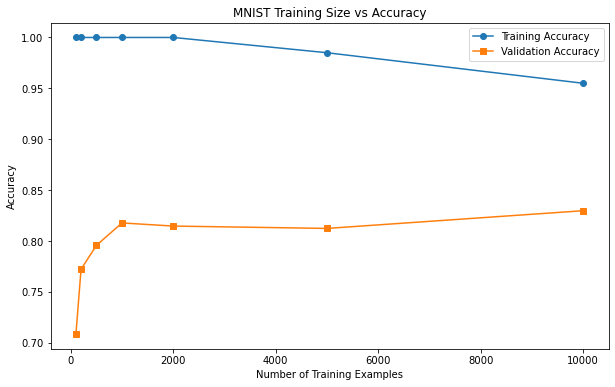

In [7]:
#Q4 (a)
# Plotting the results
plt.figure(figsize=(10, 6))

# Training accuracy plot
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', marker='o')

# Validation accuracy plot
plt.plot(training_sizes, validation_accuracies, label='Validation Accuracy', marker='s')

# Titles and labels
plt.title('MNIST Training Size vs Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [9]:
#Q4 (b)
training_data_3 = shuffled_training_data_3
training_labels_3 = shuffled_training_labels_3
training_sizes = [100, 200, 500, 1000, 2000, len(training_data_3)]
train_accuracies = []
validation_accuracies = []

for size in training_sizes:
    subset_data = training_data_3[:size]
    subset_labels = training_labels_3[:size]
    
    svm_model = LinearSVC(max_iter=5000)
    svm_model.fit(subset_data, subset_labels)
    
    train_predictions_3 = svm_model.predict(subset_data)
    vali_predictions_3 = svm_model.predict(vali_data_3)
    
    y_trues_3 = subset_labels
    y_trues_4 = vali_labels_3
    
    train_accuracies.append(accuracy(train_predictions_3, y_trues_3))
    validation_accuracies.append(accuracy(vali_predictions_3, y_trues_4))
    
print(train_accuracies)
print(validation_accuracies)


/Users/zihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/zihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[0.91, 0.885, 0.86, 0.862, 0.8465, 0.8436825701270678]
[0.8321342925659473, 0.8465227817745803, 0.8585131894484412, 0.8597122302158273, 0.8561151079136691, 0.8573141486810552]


/Users/zihan/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


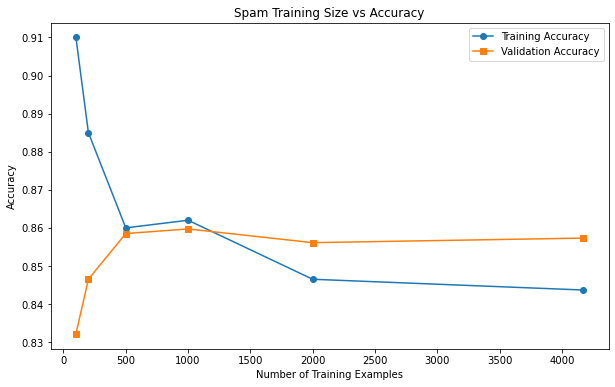

In [10]:
#Q4 (b)#
# Plotting the results
plt.figure(figsize=(10, 6))

# Training accuracy plot
plt.plot(training_sizes, train_accuracies, label='Training Accuracy', marker='o')

# Validation accuracy plot
plt.plot(training_sizes, validation_accuracies, label='Validation Accuracy', marker='s')

# Titles and labels
plt.title('Spam Training Size vs Accuracy')
plt.xlabel('Number of Training Examples')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()

In [11]:
#Q5#
C_values = [0.00000001, 0.0000001, 0.000001, 0.00001, 0.001, 0.1, 1, 10]
train_accuracies = []
validation_accuracies = []

for C_val in C_values:
    model = SVC(kernel='linear', C = C_val)
    subset_data = training_data_2[:10000]
    subset_labels = training_labels_2[:10000]
    model.fit(subset_data, subset_labels)
    
    train_predictions_2 = model.predict(subset_data)
    vali_predictions_2 = model.predict(vali_data_2)
    y_trues_1 = subset_labels
    y_trues_2 = vali_labels_2
    train_accuracies.append(accuracy(train_predictions_2, y_trues_1))
    validation_accuracies.append(accuracy(vali_predictions_2, y_trues_2))

print(f"C values are: {C_values}")
print(f"The corresponding validation accuracies are: {validation_accuracies}")
print(f"The best C value is 0.0000001, and its accuracy is 0.9294")

C values are: [1e-08, 1e-07, 1e-06, 1e-05, 0.001, 0.1, 1, 10]
The corresponding validation accuracies are: [0.8908, 0.9243, 0.9294, 0.9119, 0.9022, 0.9022, 0.9022, 0.9022]
The best C value is 0.0000001, and its accuracy is 0.9294


In [12]:
#Q7#
import pandas as pd

model = SVC(kernel='poly', degree=2, C=C_val, gamma='scale')
subset_data = training_data_2[:15000]
subset_labels = training_labels_2[:15000]
model.fit(subset_data, subset_labels)
test_data_2_load = data2["test_data"]
test_data_2 = test_data_2_load.reshape((10000, 28*28))
    
test_predictions_2 = model.predict(test_data_2)
ID = list(range(1, 10001))
    
# Combining lists into a DataFrame
df = pd.DataFrame({'Id': ID, 'Category': test_predictions_2})

# Saving the DataFrame to a CSV file
csv_filename = '189_hw1_minist.csv'
df.to_csv(csv_filename, index=False)

In [13]:
#Q6#
training_data_3 = shuffled_training_data_3
training_labels_3 = shuffled_training_labels_3
k_size = int(len(training_data_3) / 5)
vali_start_indices = [0, k_size, k_size * 2, k_size * 3, k_size * 4]
C_values = [0.1, 1, 2, 5, 8, 10, 100, 200]
train_accuracies = []
validation_accuracies = []

for C_val in C_values:
    local_train_accuracies = []
    local_validation_accuracies = []
    for vali_start_index in vali_start_indices:
        model = SVC(kernel='linear', C=C_val)
        vali_data_3 = training_data_3[vali_start_index : vali_start_index+k_size - 1]
        vali_labels_3 = training_labels_3[vali_start_index : vali_start_index+k_size - 1]
        training_data_3_new = np.concatenate((training_data_3[:vali_start_index], training_data_3[vali_start_index+k_size:]), axis = 0)
        training_labels_3_new = np.concatenate((training_labels_3[:vali_start_index], training_labels_3[vali_start_index+k_size:]), axis = 0)
        model.fit(training_data_3_new, training_labels_3_new)
        
        train_predictions_3 = model.predict(training_data_3_new)
        vali_predictions_3 = model.predict(vali_data_3)

        y_trues_1 = training_labels_3_new
        y_trues_2 = vali_labels_3
        local_train_accuracies.append(accuracy(train_predictions_3, y_trues_1))
        local_validation_accuracies.append(accuracy(vali_predictions_3, y_trues_2))
        
    train_accuracy = np.mean(local_train_accuracies)
    validation_accuracy = np.mean(local_validation_accuracies)
    train_accuracies.append(train_accuracy)
    validation_accuracies.append(validation_accuracy)
    
print(f"C values are: {C_values}")
print(f"validation accuracies are: {validation_accuracies}")
print(f"The best C value is 200, and its accuracy is 0.8408")


C values are: [0.1, 1, 2, 5, 8, 10, 100, 200]
validation accuracies are: [0.8249699879951982, 0.8336134453781513, 0.8350540216086435, 0.8369747899159664, 0.8376950780312125, 0.8388955582232894, 0.8405762304921968, 0.8408163265306122]
The best C value is 200, and its accuracy is 0.8408


In [14]:
#Q7#
model = SVC(kernel='linear', C=200)
model.fit(training_data_3, training_labels_3)
test_data_3 = data3["test_data"]
test_predictions_3 = model.predict(test_data_3)

ID = list(range(1, 1001))
    
# Combining lists into a DataFrame
df = pd.DataFrame({'Id': ID, 'Category': test_predictions_3})

# Saving the DataFrame to a CSV file
csv_filename = '189_hw1_spam.csv'
df.to_csv(csv_filename, index=False)